## Hypothesis Testing
### Dataset on Electric Car Usage

In [ ]:
# Importing the required python libraries 
# to be used in our analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing the csv file for data cleaning and analysis

autolib_df = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
# pre-viewing the top dataset
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# pre-viewing the last dataset
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Finding the number of columns and rows in the dataset

autolib_df.shape

(16085, 13)

In [ ]:
# Finding the data types of the variables

autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

### Data cleaning

In [ ]:
# finding the missing data in the dataset

autolib_df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

> Our dataset does not contain the null values

In [ ]:
# Renaming the column names

autolib_df.rename({'Postal code': 'postal_code', 'dayOfweek': 'day_of_week'}, axis=1, inplace=True)

In [ ]:
# Finding the description of the data

autolib_df.describe()

,postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


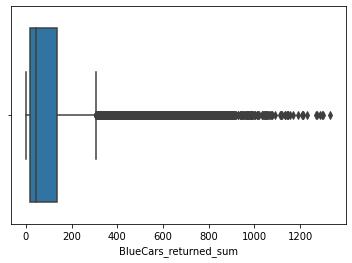

In [ ]:
# Checking for the outliers
print(sns.boxplot(autolib_df['BlueCars_returned_sum']))


> Most of the data set is in the out liers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


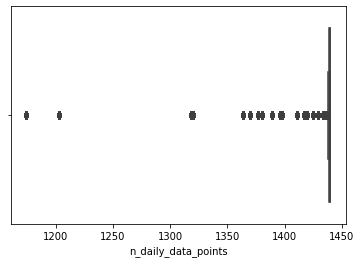

In [ ]:
# checking for outliers

print(sns.boxplot(autolib_df['n_daily_data_points']))

> Some data points are the outliers zone.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


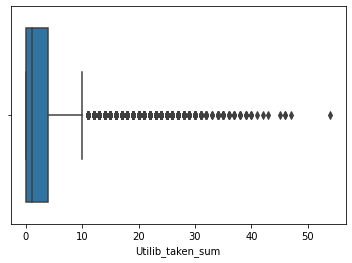

In [ ]:
# checking for outliers

print(sns.boxplot(autolib_df['Utilib_taken_sum']))

> Alot of the data is in the outliers, we therefore will have to rectify the situation

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


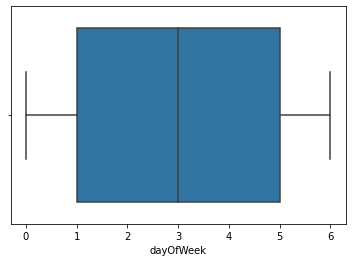

In [ ]:
# checking for outliers

print(sns.boxplot(autolib_df['dayOfWeek']))

> There are no outliers in the data of the days of the week

In [ ]:
# checking for anormalities

Q1 = autolib_df.quantile(0.25)
Q3 = autolib_df.quantile(0.75)

IQR = Q3 - Q1
IQR

postal_code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0
Utilib_returned_sum          4.0
Utilib_14_taken_sum          9.0
Utilib_14_returned_sum       9.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64

### Univariate Analysis

In [ ]:
# Finding the information of the dataset
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
# Finding the mean of the dataset

autolib_df[{'n_daily_data_points', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'}].mean()

Utilib_taken_sum             3.698290
BlueCars_taken_sum         125.926951
Slots_freed_sum             22.629033
Slots_taken_sum             22.629282
n_daily_data_points       1431.330619
BlueCars_returned_sum      125.912714
Utilib_returned_sum          3.699099
Utilib_14_taken_sum          8.600560
Utilib_14_returned_sum       8.599192
dtype: float64

In [ ]:
# Finding the mode of the dataset

autolib_df[{'n_daily_data_points', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'}].mode()

,Utilib_taken_sum,BlueCars_taken_sum,Slots_freed_sum,Slots_taken_sum,n_daily_data_points,BlueCars_returned_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum
0,0,12,0,0,1440,13,0,0,0


In [ ]:
# Finding the median of the dataset


autolib_df[{'n_daily_data_points', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'}].median()

Utilib_taken_sum             1.0
BlueCars_taken_sum          46.0
Slots_freed_sum              0.0
Slots_taken_sum              0.0
n_daily_data_points       1440.0
BlueCars_returned_sum       46.0
Utilib_returned_sum          1.0
Utilib_14_taken_sum          3.0
Utilib_14_returned_sum       3.0
dtype: float64

In [ ]:
# Finding the variance 

autolib_df[{'n_daily_data_points', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'}].var()

Utilib_taken_sum             33.814897
BlueCars_taken_sum        34383.016113
Slots_freed_sum            2716.521850
Slots_taken_sum            2719.208431
n_daily_data_points        1103.040274
BlueCars_returned_sum     34410.819414
Utilib_returned_sum          33.926364
Utilib_14_taken_sum         165.639430
Utilib_14_returned_sum      165.610979
dtype: float64

In [ ]:
# Finding the standerd deviation

autolib_df[{'n_daily_data_points', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'}].std()

Utilib_taken_sum            5.815058
BlueCars_taken_sum        185.426579
Slots_freed_sum            52.120263
Slots_taken_sum            52.146030
n_daily_data_points        33.212050
BlueCars_returned_sum     185.501535
Utilib_returned_sum         5.824634
Utilib_14_taken_sum        12.870098
Utilib_14_returned_sum     12.868993
dtype: float64

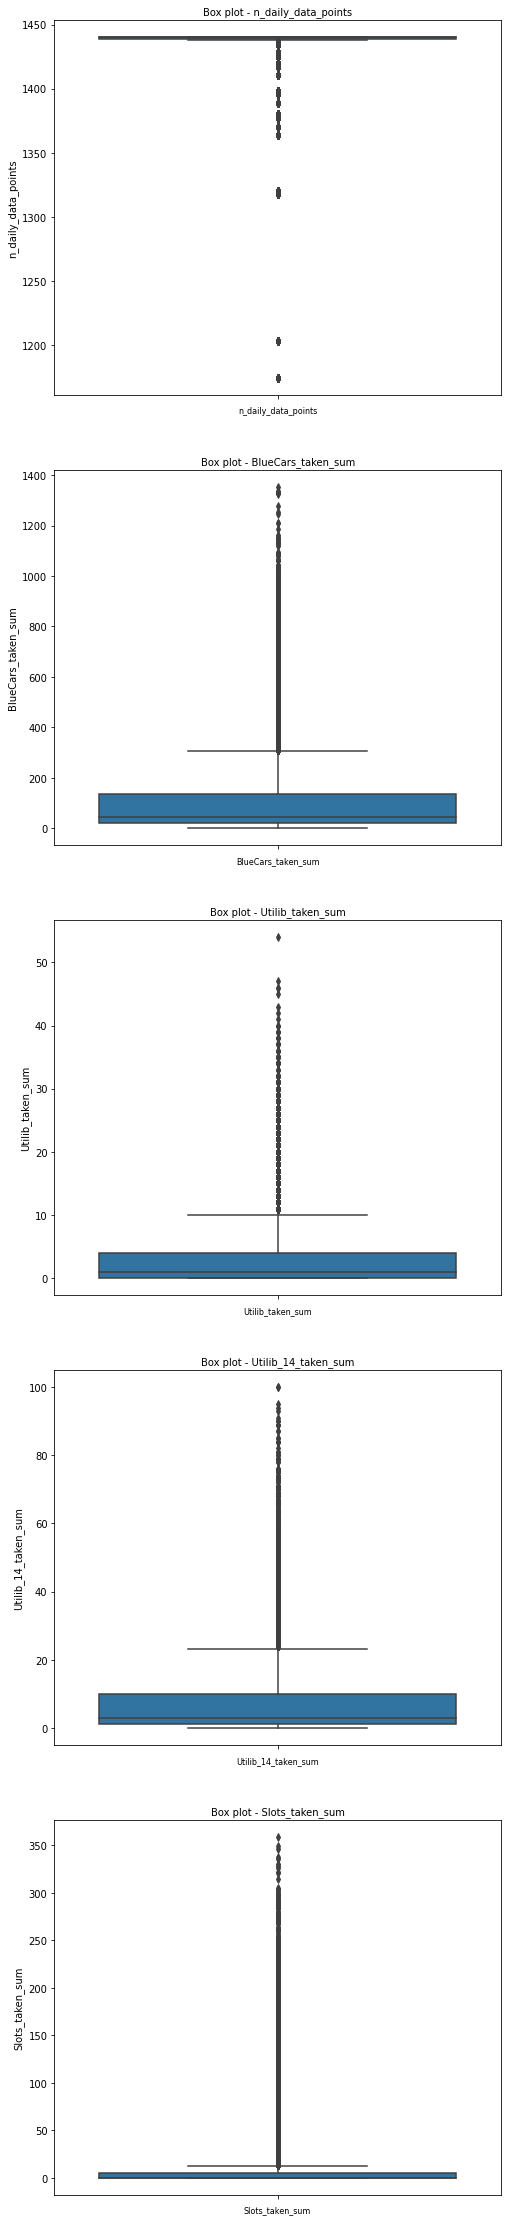

In [ ]:
col_names = ['n_daily_data_points', 'BlueCars_taken_sum', 'Utilib_taken_sum', 'Utilib_14_taken_sum', 'Slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = autolib_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [ ]:
# Removing the outliers

autolib_df1 = autolib_df[~((autolib_df < (Q1 - 1.5 * IQR)) |(autolib_df > (Q3 + 1.5 * IQR))).any(axis=1)]
autolib_df1

,postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,0,0,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0


Text(0.5, 1.0, 'Weekday/Weekend')

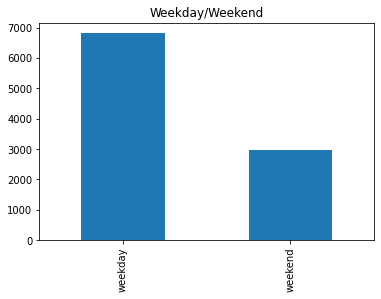

In [ ]:
# Records from different days

autolib_df1.day_type.value_counts().plot.bar()
plt.title('Weekday/Weekend')

> Week days had more cars leaving and returning than over the weekends.

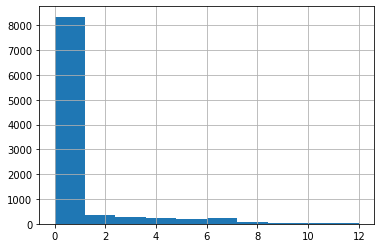

In [ ]:
# Histogram
autolib_df1['Slots_freed_sum'].hist()

> Under our slot freed sum most of the data were between 0 and 1

In [ ]:
# Finding the skewness of the data

autolib_df1[{'n_daily_data_points', 'BlueCars_taken_sum', 'Utilib_taken_sum', 'Utilib_14_taken_sum', 'Slots_taken_sum'}].skew()

Utilib_taken_sum       1.652089
BlueCars_taken_sum     1.791195
Slots_taken_sum        3.168595
n_daily_data_points   -1.725347
Utilib_14_taken_sum    1.621941
dtype: float64

In [ ]:
# Finding the Kurtosis of the data

autolib_df1[{'n_daily_data_points', 'BlueCars_taken_sum', 'Utilib_taken_sum', 'Utilib_14_taken_sum', 'Slots_taken_sum'}].kurt()

Utilib_taken_sum        2.685229
BlueCars_taken_sum      3.910795
Slots_taken_sum        10.570743
n_daily_data_points     1.947547
Utilib_14_taken_sum     2.847781
dtype: float64

## Bivariate Analysis and Plotting

In [ ]:
autolib_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 3899 to 16083
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             9783 non-null   int64 
 1   date                    9783 non-null   object
 2   n_daily_data_points     9783 non-null   int64 
 3   dayOfWeek               9783 non-null   int64 
 4   day_type                9783 non-null   object
 5   BlueCars_taken_sum      9783 non-null   int64 
 6   BlueCars_returned_sum   9783 non-null   int64 
 7   Utilib_taken_sum        9783 non-null   int64 
 8   Utilib_returned_sum     9783 non-null   int64 
 9   Utilib_14_taken_sum     9783 non-null   int64 
 10  Utilib_14_returned_sum  9783 non-null   int64 
 11  Slots_freed_sum         9783 non-null   int64 
 12  Slots_taken_sum         9783 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 1.0+ MB


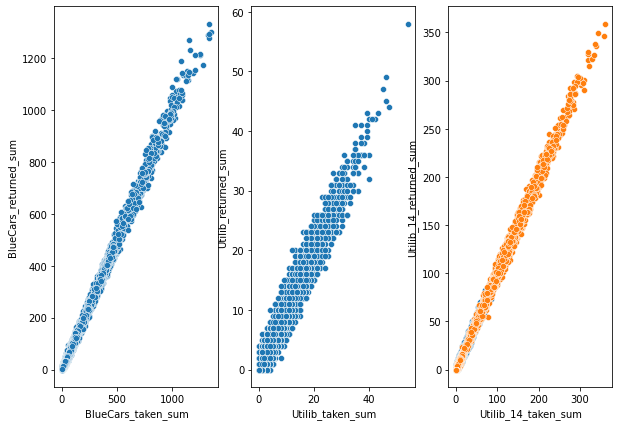

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10, 7))
fig.suptitle('')
sns.scatterplot(x= autolib_df.BlueCars_taken_sum , y= autolib_df.BlueCars_returned_sum, ax=ax1)
sns.scatterplot(x= autolib_df.Utilib_taken_sum, y= autolib_df.Utilib_returned_sum, ax=ax2)
sns.scatterplot(x=autolib_df.Utilib_14_taken_sum , y= autolib_df.Utilib_14_returned_sum, ax=ax3)
sns.scatterplot(x=autolib_df.Slots_freed_sum , y= autolib_df.Slots_taken_sum, ax=ax3)
plt.show()

> There is a strong correlation within the pairs of the related data

In [ ]:
# Finding a correlation between the dataset
pearson_coeff = autolib_df["BlueCars_taken_sum"].corr(autolib_df["BlueCars_returned_sum"], method="pearson") 
print('BlueCars', pearson_coeff)
pearson_coeff = autolib_df['Utilib_taken_sum'].corr(autolib_df["Utilib_returned_sum"], method="pearson") 
print('Utilib_Corr', pearson_coeff)
pearson_coeff = autolib_df["Utilib_14_taken_sum"].corr(autolib_df["Utilib_14_returned_sum"], method="pearson") 
print('Utilib_14_Corr', pearson_coeff)

BlueCars 0.9986597051672196
Utilib_Corr 0.9819819805363549
Utilib_14_Corr 0.9920620707048168


> There is a strong correlation between blue cars, utilib and utilib_14, there stand a strong relationship

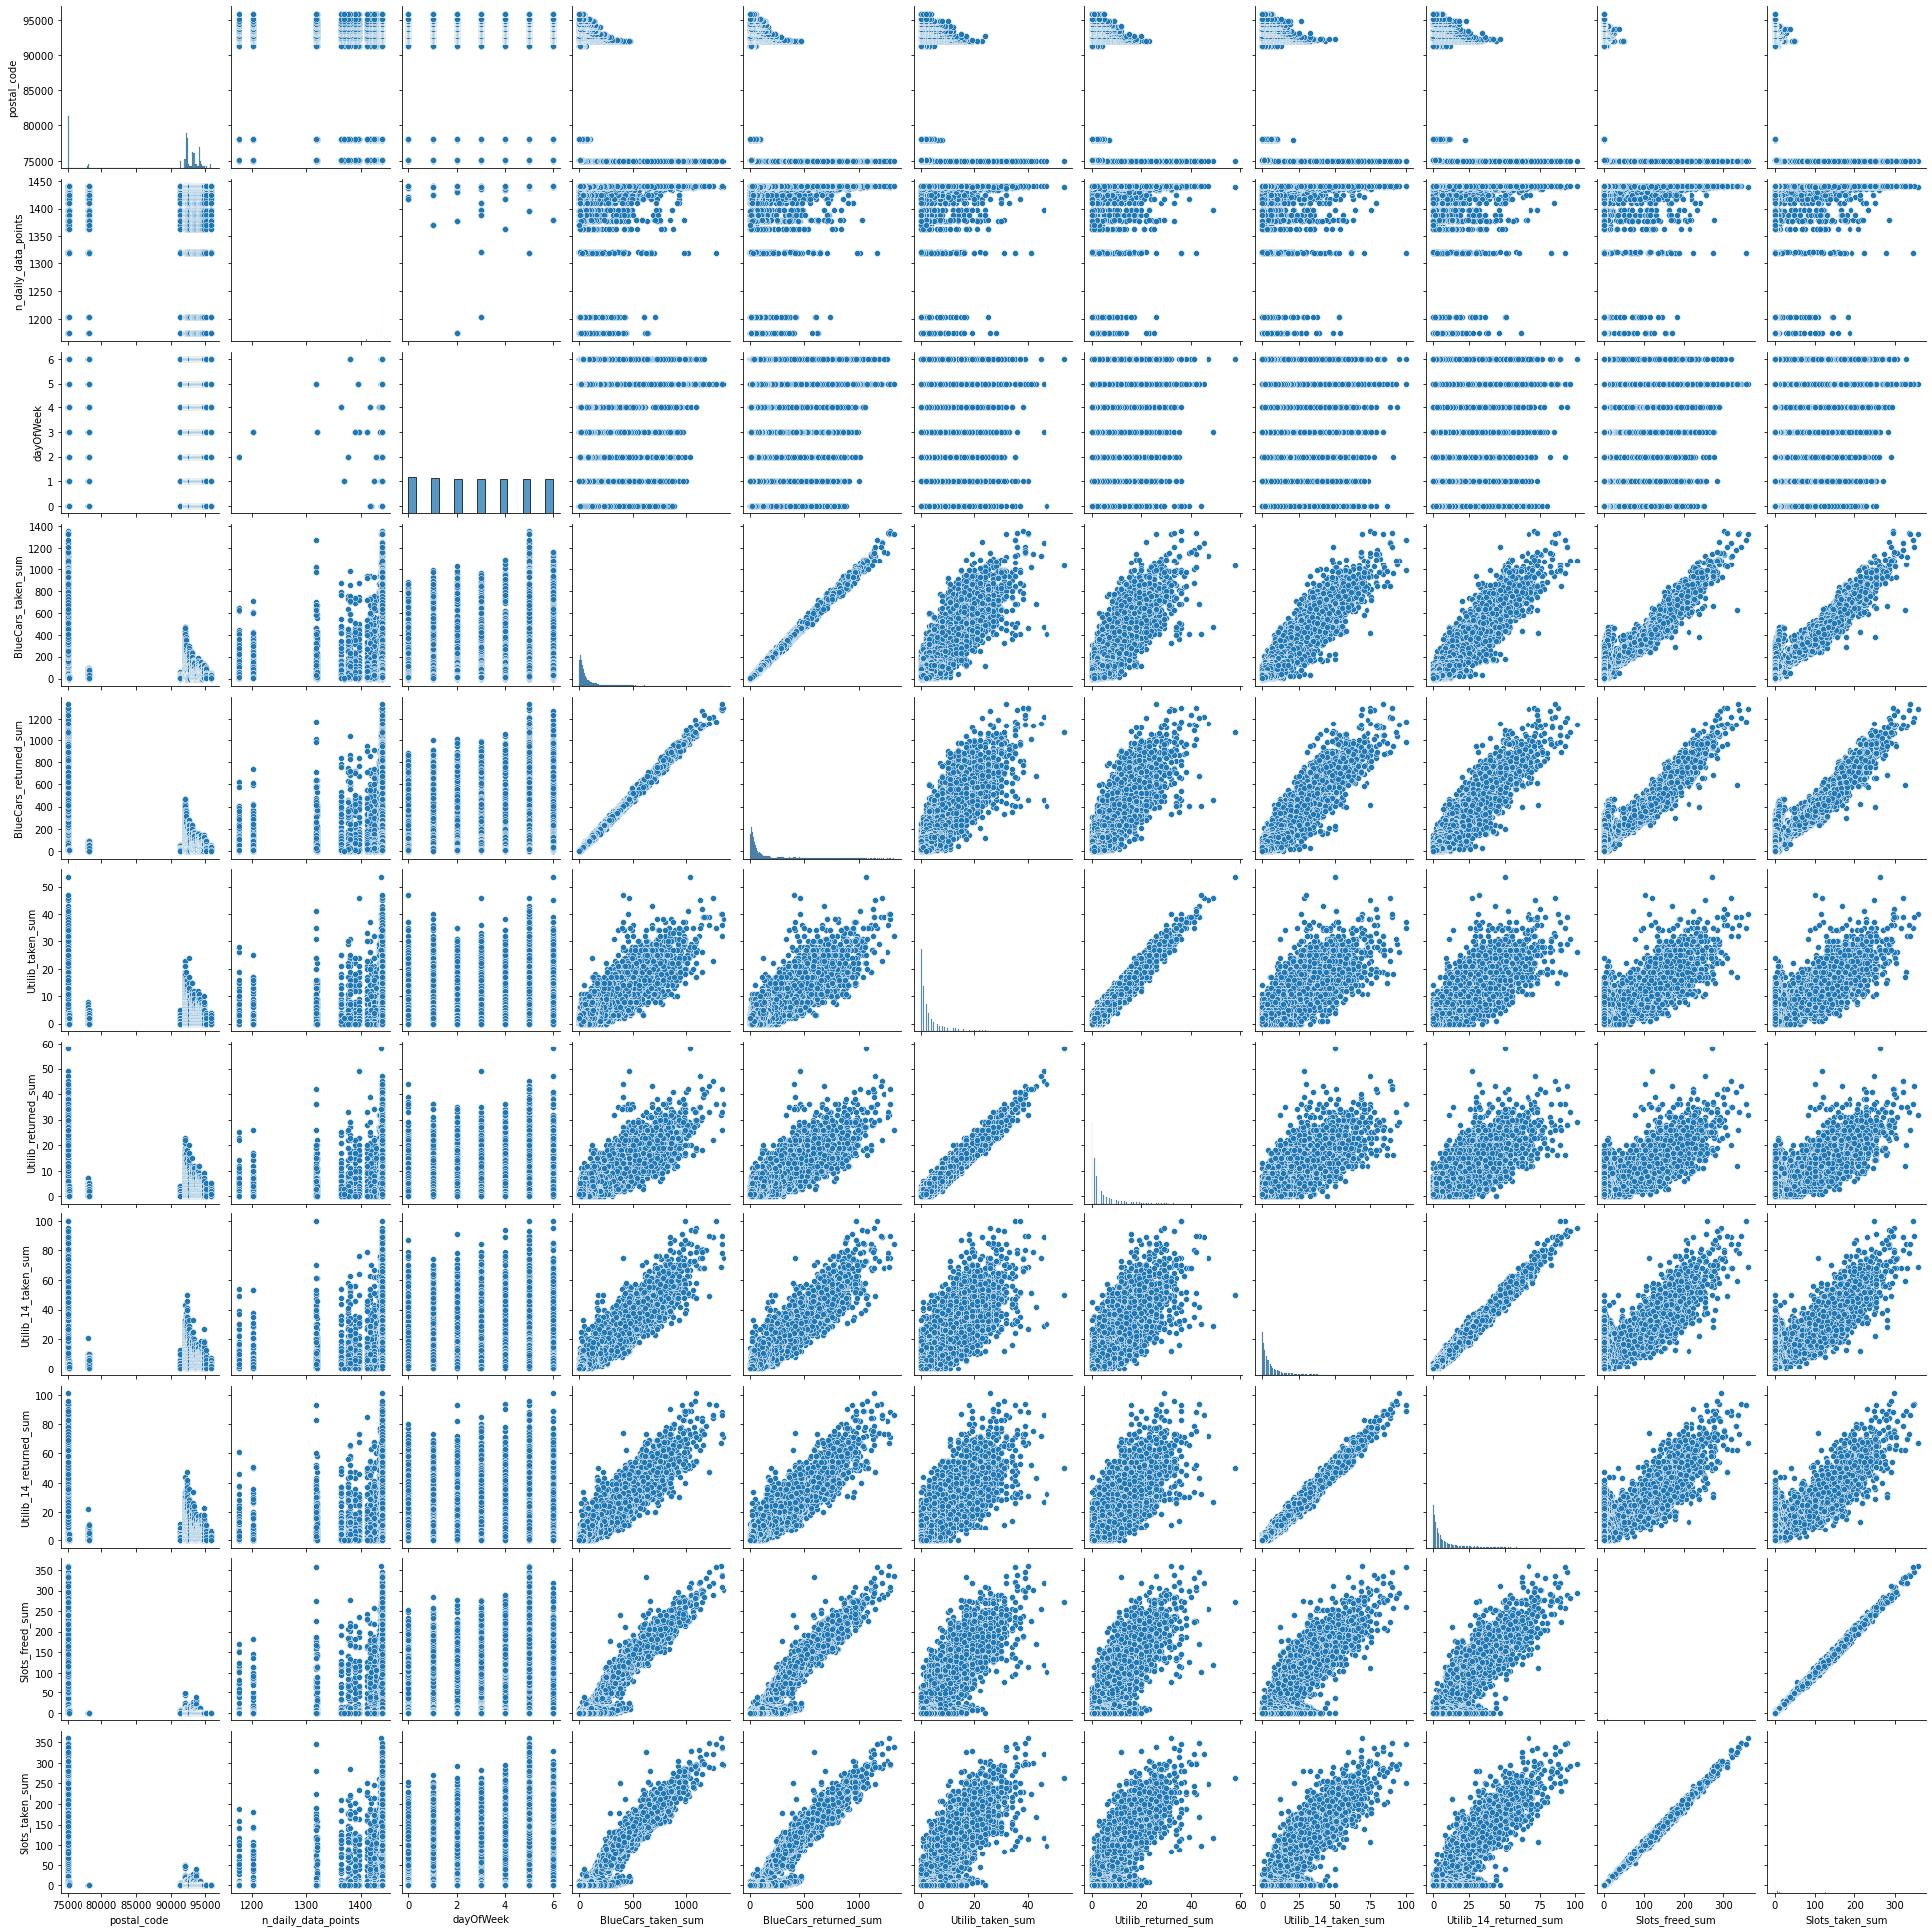

In [ ]:
# ploting for correlation

sns.pairplot(autolib_df)
plt.show()

> scatter plot, visualizing the relationship and correlation between variables.

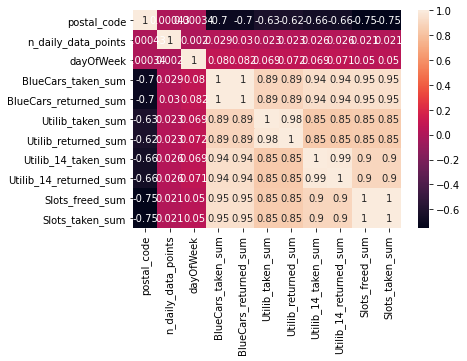

In [ ]:
#The heatmap showing correlation and lack of correlation for the numerical data

sns.heatmap(autolib_df.corr(),annot=True)
plt.show()

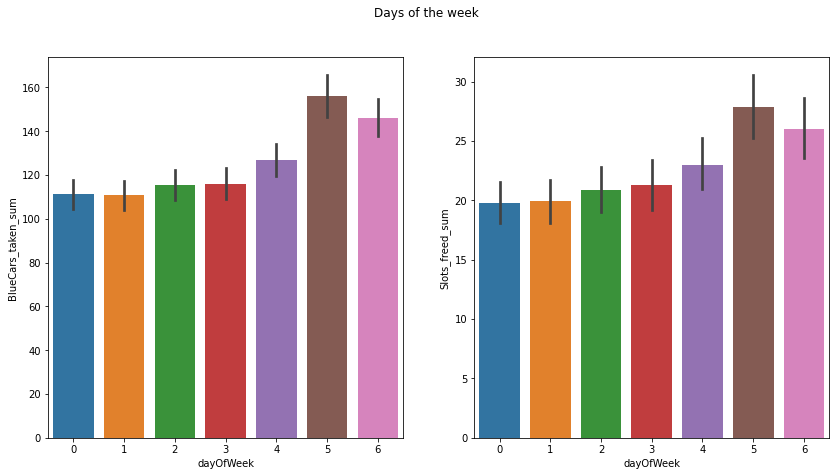

In [ ]:
# For the days of the week
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 7))
fig.suptitle('Days of the week')
sns.barplot(x= autolib_df.dayOfWeek, y= autolib_df.BlueCars_taken_sum, ax=ax1)
sns.barplot(x= autolib_df.dayOfWeek, y= autolib_df.Slots_freed_sum, ax=ax2)
plt.show()

In [ ]:
autolib_df1['postal_code'].value_counts()

94130    130
92160    130
91400    130
94450    130
94410    130
        ... 
93260    101
92800     82
93390     72
92130     65
92100      4
Name: postal_code, Length: 79, dtype: int64

In [ ]:
# reseting our index

autolib_df1.reset_index(inplace=True)
autolib_df1.head()

,index,postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
1,3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
2,3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3,3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
4,3905,91330,1/7/2018,1440,6,weekend,28,17,0,0,1,1,4,2


In [ ]:
# Selecting a certain code to work with

sort_autolib = autolib_df1[(autolib_df1['postal_code'] == 92160) | (autolib_df1['day_type'] == 'weekday')]
sort_autolib

,index,postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
1,3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
2,3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3,3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
5,3906,91330,1/8/2018,1438,0,weekday,3,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9776,16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
9777,16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
9778,16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
9779,16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0


> From our dataset, we select data on the week days, we are either to work with week day data or weekend.

In [ ]:
# Selecting a random sample of n = 100 

autolib_sample = sort_autolib.sample(n=100, random_state=101)
autolib_sample.head()

,index,postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
6115,11677,93360,1/31/2018,1440,2,weekday,19,21,0,1,0,0,0,0
9070,15226,94500,3/22/2018,1440,3,weekday,22,24,0,1,1,3,0,0
2564,7235,92290,3/7/2018,1440,2,weekday,16,18,0,0,0,0,0,0
2037,6601,92240,2/22/2018,1440,3,weekday,94,97,2,1,5,7,0,0
9702,15989,95880,3/5/2018,1440,0,weekday,19,23,0,0,0,0,0,0


> From the selected week day data, we randomly sample a 100 dataset which we shall use in our analysis

In [ ]:
autolib_sample.value_counts()

index  postal_code  date       n_daily_data_points  dayOfWeek  day_type  BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  Utilib_returned_sum  Utilib_14_taken_sum  Utilib_14_returned_sum  Slots_freed_sum  Slots_taken_sum
15989  95880        3/5/2018   1440                 0          weekday   19                  23                     0                 0                    0                    0                       0                0                  1
8061   92340        4/24/2018  1439                 1          weekday   10                  8                      0                 0                    1                    3                       0                0                  1
7031   92270        1/15/2018  1440                 0          weekday   24                  21                     4                 4                    1                    1                       0                0                  1
7189   92290        1/17/2018  1440                 2

In [ ]:
autolib_sample.shape

(100, 14)

In [ ]:
autolib_data_points = autolib_sample[autolib_sample['n_daily_data_points'] == 1439]
autolib_data_points

,index,postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
7697,13582,94120,6/12/2018,1439,1,weekday,49,52,1,0,9,9,0,0
3075,7878,92330,3/26/2018,1439,0,weekday,28,31,2,2,1,0,4,4
3015,7808,92330,1/12/2018,1439,4,weekday,41,37,3,4,1,1,2,2
5519,10929,93230,3/6/2018,1439,1,weekday,14,14,1,1,0,0,0,0
8264,14260,94220,2/16/2018,1439,4,weekday,44,42,1,1,0,3,0,0
7804,13709,94130,5/3/2018,1439,3,weekday,33,29,0,1,1,0,0,0
1948,6492,92230,4/13/2018,1439,4,weekday,67,60,1,1,2,6,0,0
3225,8061,92340,4/24/2018,1439,1,weekday,10,8,0,0,1,3,0,0
1818,6336,92220,4/13/2018,1439,4,weekday,61,53,0,0,8,7,1,1
657,4855,92120,1/23/2018,1439,1,weekday,84,87,2,3,5,5,0,0


> From the randomly sampled dataset we sort data on daily bonga points available on that day in the area which results to a sample of 20 rows

In [ ]:
autolib_data_points.shape

(20, 14)

### Testing the null hypothesis

> H0: There is no difference between BlueCars taken sum and BlueCars returned sum of n daily data points of 1439.

> Ha: There is a difference between BlueCars taken sum and BlueCars returned sum of n daily data points of 1439.

> Our significant value is 0.05

> Our sample size is 20

> we shall use the t-statistics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


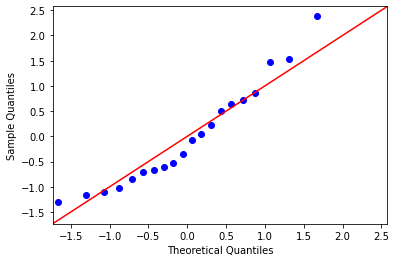

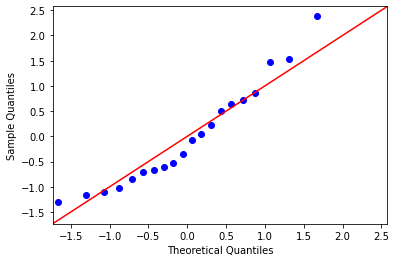

In [ ]:
# Testing for normality

import statsmodels.api as sm
import pylab

sm.qqplot(autolib_data_points['BlueCars_taken_sum'], fit = True, line= '45')

> Testing our normality using the (QQ)Plot, the data is normaly distributed since the line of fitness passes within the data. None of the dataset fall farther away from the line of fitness. 

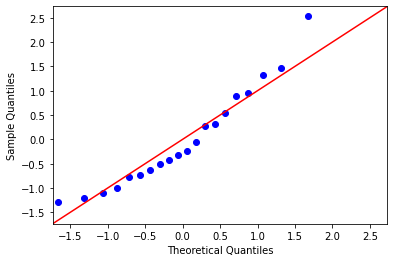

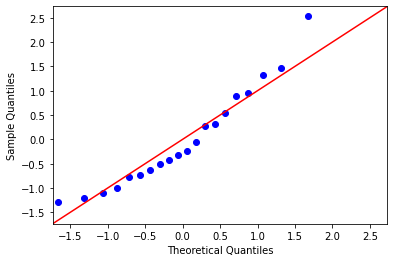

In [ ]:
# Testing for normality

sm.qqplot(autolib_data_points['BlueCars_returned_sum'], fit = True, line= '45')

In [ ]:
from scipy import stats
# Print the p values
stats.shapiro (autolib_data_points['BlueCars_taken_sum'])
# (The test statistic, the p-value) 


(0.9348300695419312, 0.19117261469364166)

In [ ]:
# Print the p values
stats.shapiro (autolib_data_points['BlueCars_returned_sum'])
# (The test statistic, the p-value) 

(0.9319412112236023, 0.16827715933322906)

In [ ]:
x_bar1 = autolib_data_points['BlueCars_taken_sum'].mean()
x_bar2 = autolib_data_points['BlueCars_returned_sum'].mean()

sigma_1 = autolib_data_points['BlueCars_taken_sum'].std()
sigma_2 = autolib_data_points['BlueCars_returned_sum'].std()

print( x_bar1, x_bar2)
print(sigma_1, sigma_2)
# finding the degree of freedom
n_1 = 20-1
n_2 = 20-1

sigma_pooled =(((n_1 - 1)*(sigma_1 ** 2)) + ((n_2 - 2) * (sigma_2 ** 2))) / (n_1+n_2 - 2)
print(sigma_pooled)
# Note that the degrees of freedom for this pooled variance t-test is n1 + n2  - 2. 
# 20 + 20  - 2 = 38.
degrees_of_freedom = n_1 + n_2 - 2
print(degrees_of_freedom)
alpha = 0.05
t_critical = stats.t.ppf(1-(alpha/2), degrees_of_freedom) # Represents
t_critical


42.85 43.8
28.806569060765145 30.353357570283286
849.979970760234
36


2.0280940009804502

> We find the mean and standard deviation of our dataset, we find the degree of freedom, the t critical value is also determined.

In [ ]:
# finding the p-value

# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(autolib_data_points['BlueCars_taken_sum'], autolib_data_points['BlueCars_returned_sum'])

t_statistic, p_value
# Correct value from resource.

(-0.10152607145968029, 0.9196666911791453)

> The t-test is -0.102, and p - 0.92, from the p-value we fail to reject the null hypothesis since there are no statistical significance.

### Point Estimation

In [ ]:
# Finding the total blue car mean and the sample blue car mean

print (autolib_df1['BlueCars_taken_sum'].mean())

print (autolib_data_points['BlueCars_taken_sum'].mean())
# calculate how much the estimated mean differs from the main mean

print ((autolib_df1['BlueCars_taken_sum'].mean()) - (autolib_data_points['BlueCars_taken_sum'].mean()))

49.242870285188594
42.85
6.392870285188593


> For our point estimation, we find the population mean and sample mean and the difference determined, the sample mean is not exarct because we are making a conclusion based on sample.

### Confidence interval around the parameter

In [ ]:
# Finding the standard error of the mean of data 
#from math import *
from math import *
import math

Standard_Error = sigma_1/ math.sqrt(n_1 + n_2)
print(Standard_Error)
t_critical = stats.t.ppf(1-(alpha/2), degrees_of_freedom) # Two tail test
print(t_critical)

Margin_of_Error = t_critical * Standard_Error
print(Margin_of_Error)

Lower_Bound = x_bar1 - Margin_of_Error
Upper_Bound = x_bar1 + Margin_of_Error
print(str(Lower_Bound) + ' lower bound ' + str(x_bar1) + ' upper bound ' + str(Upper_Bound))

4.673042570938778
2.0280940009804502
9.477369604447196
33.372630395552804 lower bound 42.85 upper bound 52.3273696044472


> For the confidence interval, we determine the lower limit and upper limit within which the population mean and sample mean should fall within.